In [ ]:
import pandas as pd


# Load one raw file first 
df = pd.read_csv(
    "../../data/raw/Bakerloo.csv"
)

print(df.shape)
df.head()


(407, 28)


,$type,id,operationType,vehicleId,naptanId,stationName,lineId,lineName,platformName,direction,...,timeToLive,modeName,timing.$type,timing.countdownServerAdjustment,timing.source,timing.insert,timing.read,timing.sent,timing.received,api_fetch_time
0,"Tfl.Api.Presentation.Entities.Prediction, Tfl....",727190231,1,243,940GZZLURGP,Regent's Park Underground Station,bakerloo,Bakerloo,Northbound - Platform 1,outbound,...,2025-11-27T11:37:09Z,tube,Tfl.Api.Presentation.Entities.PredictionTiming...,00:00:00,0001-01-01T00:00:00,0001-01-01T00:00:00,2025-11-27T11:26:02.032Z,2025-11-27T11:25:53Z,0001-01-01T00:00:00,2025-11-27 11:26:26
1,"Tfl.Api.Presentation.Entities.Prediction, Tfl....",570679767,1,245,940GZZLUWKA,Warwick Avenue Underground Station,bakerloo,Bakerloo,Northbound - Platform 1,outbound,...,2025-11-27T11:34:10Z,tube,Tfl.Api.Presentation.Entities.PredictionTiming...,00:00:00,0001-01-01T00:00:00,0001-01-01T00:00:00,2025-11-27T11:26:02.543Z,2025-11-27T11:25:53Z,0001-01-01T00:00:00,2025-11-27 11:26:26
2,"Tfl.Api.Presentation.Entities.Prediction, Tfl....",1130588293,1,243,940GZZLUQPS,Queen's Park Underground Station,bakerloo,Bakerloo,Northbound - Platform 3,NaN,...,2025-11-27T11:53:09Z,tube,Tfl.Api.Presentation.Entities.PredictionTiming...,00:00:00,0001-01-01T00:00:00,0001-01-01T00:00:00,2025-11-27T11:26:01.73Z,2025-11-27T11:25:53Z,0001-01-01T00:00:00,2025-11-27 11:26:26
3,"Tfl.Api.Presentation.Entities.Prediction, Tfl....",-767828621,1,231,940GZZLUEAC,Elephant & Castle Underground Station,bakerloo,Bakerloo,Northbound - Platform 3,NaN,...,2025-11-27T11:46:10Z,tube,Tfl.Api.Presentation.Entities.PredictionTiming...,00:00:00,0001-01-01T00:00:00,0001-01-01T00:00:00,2025-11-27T11:25:59.428Z,2025-11-27T11:25:53Z,0001-01-01T00:00:00,2025-11-27 11:26:26
4,"Tfl.Api.Presentation.Entities.Prediction, Tfl....",-1576496683,1,237,940GZZLUEAC,Elephant & Castle Underground Station,bakerloo,Bakerloo,Northbound - Platform 4,NaN,...,2025-11-27T11:44:10Z,tube,Tfl.Api.Presentation.Entities.PredictionTiming...,00:00:00,0001-01-01T00:00:00,0001-01-01T00:00:00,2025-11-27T11:25:59.428Z,2025-11-27T11:25:53Z,0001-01-01T00:00:00,2025-11-27 11:26:26


In [3]:
#Read all 6 CSV files
FILES = {
    "Bakerloo": "../../data/raw/Bakerloo.csv",
    "Central": "../../data/raw/Central.csv",
    "Northern": "../../data/raw/Northern.csv",
    "Piccadilly": "../../data/raw/Piccadilly.csv",
    "Victoria": "../../data/raw/Victoria.csv",
    "Metropolitan": "../../data/raw/Metropolitan.csv"
}

dataframes = {}

for line, path in FILES.items():
    df = pd.read_csv(path)
    dataframes[line] = df

print("Raw datasets loaded")



Raw datasets loaded


In [4]:
print("COLUMN COUNT CHECK")

for line, df in dataframes.items():
    print(f"{line}: {len(df.columns)} columns")


COLUMN COUNT CHECK
Bakerloo: 28 columns
Central: 28 columns
Northern: 28 columns
Piccadilly: 28 columns
Victoria: 28 columns
Metropolitan: 28 columns


In [5]:
#count check 

print("ROW COUNT CHECK")
for line, df in dataframes.items():
    print(f"{line}: {df.shape[0]} rows")


ROW COUNT CHECK
Bakerloo: 407 rows
Central: 1095 rows
Northern: 1409 rows
Piccadilly: 735 rows
Victoria: 446 rows
Metropolitan: 289 rows


In [6]:
print("ALL COLUMN NAMES PER FILE")

for line, df in dataframes.items():
    print(f"\n {line} ({len(df.columns)} columns):")
    for col in df.columns:
        print(col)


ALL COLUMN NAMES PER FILE

 Bakerloo (28 columns):
$type
id
operationType
vehicleId
naptanId
stationName
lineId
lineName
platformName
direction
bearing
destinationNaptanId
destinationName
timestamp
timeToStation
currentLocation
towards
expectedArrival
timeToLive
modeName
timing.$type
timing.countdownServerAdjustment
timing.source
timing.insert
timing.read
timing.sent
timing.received
api_fetch_time

 Central (28 columns):
$type
id
operationType
vehicleId
naptanId
stationName
lineId
lineName
platformName
direction
bearing
destinationNaptanId
destinationName
timestamp
timeToStation
currentLocation
towards
expectedArrival
timeToLive
modeName
timing.$type
timing.countdownServerAdjustment
timing.source
timing.insert
timing.read
timing.sent
timing.received
api_fetch_time

 Northern (28 columns):
$type
id
operationType
vehicleId
naptanId
stationName
lineId
lineName
platformName
direction
bearing
destinationNaptanId
destinationName
timestamp
timeToStation
currentLocation
towards
expectedArrival

In [7]:
all_columns = set()

for df in dataframes.values():
    all_columns.update(df.columns)

print("UNIQUE COLUMNS ACROSS ALL FILES")
for col in sorted(all_columns):
    print(col)


UNIQUE COLUMNS ACROSS ALL FILES
$type
api_fetch_time
bearing
currentLocation
destinationName
destinationNaptanId
direction
expectedArrival
id
lineId
lineName
modeName
naptanId
operationType
platformName
stationName
timeToLive
timeToStation
timestamp
timing.$type
timing.countdownServerAdjustment
timing.insert
timing.read
timing.received
timing.sent
timing.source
towards
vehicleId


In [16]:
print("SHAPE OF ALL DATASETS (rows, columns)")

for line, df in dataframes.items():
    print(f"{line}: {df.shape}")


SHAPE OF ALL DATASETS (rows, columns)
Bakerloo: (407, 28)
Central: (1095, 28)
Northern: (1409, 28)
Piccadilly: (735, 28)
Victoria: (446, 28)
Metropolitan: (289, 28)


In [8]:
# check null values 

print("NULL VALUE ANALYSIS")

for line, df in dataframes.items():
    print(f"\n {line}")
    print("Total null values:", df.isnull().sum().sum())



NULL VALUE ANALYSIS

 Bakerloo
Total null values: 462

 Central
Total null values: 1140

 Northern
Total null values: 1479

 Piccadilly
Total null values: 821

 Victoria
Total null values: 497

 Metropolitan
Total null values: 475


In [9]:
#perdataset per coloumn - null value count

print("NULL VALUES PER COLUMN (PER DATASET)\n")

for line, df in dataframes.items():
    print(f"DATASET: {line}")
    
    null_counts = df.isnull().sum()
    
    # Print only columns that actually have nulls
    null_counts = null_counts[null_counts > 0]
    
    if null_counts.empty:
        print("No null values found")
    else:
        for col, count in null_counts.items():
            print(f"{col} : {count}")
    
    print("-" * 50)


NULL VALUES PER COLUMN (PER DATASET)

DATASET: Bakerloo
direction : 55
bearing : 407
--------------------------------------------------
DATASET: Central
direction : 45
bearing : 1095
--------------------------------------------------
DATASET: Northern
direction : 64
bearing : 1409
currentLocation : 6
--------------------------------------------------
DATASET: Piccadilly
direction : 35
bearing : 735
destinationNaptanId : 20
destinationName : 20
currentLocation : 11
--------------------------------------------------
DATASET: Victoria
bearing : 446
direction : 51
--------------------------------------------------
DATASET: Metropolitan
bearing : 289
destinationNaptanId : 53
destinationName : 53
direction : 80
--------------------------------------------------


In [10]:
# check duplicates per dataset

print("FULL DUPLICATE CHECK (PER DATASET)")

for line, df in dataframes.items():
    full_dup_count = df.duplicated().sum()
    print(f"{line}: {full_dup_count} full duplicate rows")


FULL DUPLICATE CHECK (PER DATASET)
Bakerloo: 0 full duplicate rows
Central: 0 full duplicate rows
Northern: 0 full duplicate rows
Piccadilly: 0 full duplicate rows
Victoria: 0 full duplicate rows
Metropolitan: 0 full duplicate rows


In [14]:
# check logical duplicates
#Logical duplicate = same train, same station, same arrival time

print("LOGICAL DUPLICATION (PER DATASET)")

for line, df in dataframes.items():
    affected_rows = df[
        df.duplicated(
            subset=["vehicleId", "stationName", "expectedArrival"],
            keep=False
        )
    ].shape[0]

    print(f"{line}: {affected_rows} rows affected")


LOGICAL DUPLICATION (PER DATASET)
Bakerloo: 90 rows affected
Central: 236 rows affected
Northern: 62 rows affected
Piccadilly: 90 rows affected
Victoria: 92 rows affected
Metropolitan: 64 rows affected


In [15]:
# view logical duplicates 

print("ACTUAL LOGICAL DUPLICATE RECORDS (ALL DATASETS)")

for line, df in dataframes.items():
    dup_df = df[
        df.duplicated(
            subset=["vehicleId", "stationName", "expectedArrival"],
            keep=False
        )
    ][["vehicleId", "stationName", "expectedArrival", "timestamp"]]

    print(f"DATASET: {line}")

    if dup_df.empty:
        print("No logical duplicates found")
    else:
        display(
            dup_df.sort_values(
                ["vehicleId", "stationName", "expectedArrival", "timestamp"]
            ).head(10)
        )



ACTUAL LOGICAL DUPLICATE RECORDS (ALL DATASETS)
DATASET: Bakerloo


,vehicleId,stationName,expectedArrival,timestamp
207,204,Lambeth North Underground Station,2025-11-27T11:54:10Z,2025-11-27T11:25:53.951334Z
388,204,Lambeth North Underground Station,2025-11-27T11:54:10Z,2025-11-27T11:27:57.8162625Z
46,204,Maida Vale Underground Station,2025-11-27T11:34:09Z,2025-11-27T11:25:53.951334Z
383,204,Maida Vale Underground Station,2025-11-27T11:34:09Z,2025-11-27T11:27:57.8162625Z
72,204,Marylebone Underground Station,2025-11-27T11:41:09Z,2025-11-27T11:25:53.951334Z
301,204,Marylebone Underground Station,2025-11-27T11:41:09Z,2025-11-27T11:27:57.8162625Z
203,204,Piccadilly Circus Underground Station,2025-11-27T11:48:10Z,2025-11-27T11:25:53.951334Z
393,204,Piccadilly Circus Underground Station,2025-11-27T11:48:10Z,2025-11-27T11:27:57.8162625Z
128,204,Regent's Park Underground Station,2025-11-27T11:44:09Z,2025-11-27T11:25:53.951334Z
217,204,Regent's Park Underground Station,2025-11-27T11:44:09Z,2025-11-27T11:27:57.8162625Z


DATASET: Central


,vehicleId,stationName,expectedArrival,timestamp
314,1,Holland Park Underground Station,2025-11-27T11:31:09Z,2025-11-27T11:25:53.940421Z
638,1,Holland Park Underground Station,2025-11-27T11:31:09Z,2025-11-27T11:27:57.7023103Z
498,2,East Acton Underground Station,2025-11-27T11:37:10Z,2025-11-27T11:25:53.940421Z
711,2,East Acton Underground Station,2025-11-27T11:37:10Z,2025-11-27T11:27:57.7023103Z
34,2,Marble Arch Underground Station,2025-11-27T11:52:10Z,2025-11-27T11:25:53.940421Z
1028,2,Marble Arch Underground Station,2025-11-27T11:52:10Z,2025-11-27T11:27:57.7023103Z
409,3,East Acton Underground Station,2025-11-27T11:42:10Z,2025-11-27T11:25:53.940421Z
722,3,East Acton Underground Station,2025-11-27T11:42:10Z,2025-11-27T11:27:57.7023103Z
80,10,Hanger Lane Underground Station,2025-11-27T11:36:10Z,2025-11-27T11:25:53.940421Z
678,10,Hanger Lane Underground Station,2025-11-27T11:36:10Z,2025-11-27T11:27:57.7023103Z


DATASET: Northern


,vehicleId,stationName,expectedArrival,timestamp
20,4,Balham Underground Station,2025-11-27T11:52:04Z,2025-11-27T11:25:53.7424459Z
1302,4,Balham Underground Station,2025-11-27T11:52:04Z,2025-11-27T11:27:57.3864287Z
125,4,Bank Underground Station,2025-11-27T11:32:04Z,2025-11-27T11:25:53.7424459Z
939,4,Bank Underground Station,2025-11-27T11:32:04Z,2025-11-27T11:27:57.3864287Z
455,4,Borough Underground Station,2025-11-27T11:35:04Z,2025-11-27T11:25:53.7424459Z
1268,4,Borough Underground Station,2025-11-27T11:35:04Z,2025-11-27T11:27:57.3864287Z
496,10,Camden Town Underground Station,2025-11-27T11:28:04Z,2025-11-27T11:25:53.7424459Z
729,10,Camden Town Underground Station,2025-11-27T11:28:04Z,2025-11-27T11:27:57.3864287Z
726,12,Balham Underground Station,2025-11-27T11:38:03Z,2025-11-27T11:26:55.0054036Z
1320,12,Balham Underground Station,2025-11-27T11:38:03Z,2025-11-27T11:27:57.3864287Z


DATASET: Piccadilly


,vehicleId,stationName,expectedArrival,timestamp
66,221,Caledonian Road Underground Station,2025-11-27T11:55:04Z,2025-11-27T11:25:53.398587Z
461,221,Caledonian Road Underground Station,2025-11-27T11:55:04Z,2025-11-27T11:27:57.1687191Z
388,221,Holloway Road Underground Station,2025-11-27T11:56:03Z,2025-11-27T11:26:54.6082343Z
520,221,Holloway Road Underground Station,2025-11-27T11:56:03Z,2025-11-27T11:27:57.1687191Z
374,227,Arsenal Underground Station,2025-11-27T11:29:34Z,2025-11-27T11:25:53.398587Z
441,227,Arsenal Underground Station,2025-11-27T11:29:34Z,2025-11-27T11:27:57.1687191Z
201,227,Oakwood Underground Station,2025-11-27T11:54:04Z,2025-11-27T11:25:53.398587Z
474,227,Oakwood Underground Station,2025-11-27T11:54:04Z,2025-11-27T11:27:57.1687191Z
76,300,Caledonian Road Underground Station,2025-11-27T11:36:04Z,2025-11-27T11:25:53.398587Z
458,300,Caledonian Road Underground Station,2025-11-27T11:36:04Z,2025-11-27T11:27:57.1687191Z


DATASET: Victoria


,vehicleId,stationName,expectedArrival,timestamp
84,202,Blackhorse Road Underground Station,2025-11-27T11:54:05Z,2025-11-27T11:25:54.4133135Z
365,202,Blackhorse Road Underground Station,2025-11-27T11:54:05Z,2025-11-27T11:27:58.1592754Z
106,202,Euston Underground Station,2025-11-27T11:40:04Z,2025-11-27T11:25:54.4133135Z
341,202,Euston Underground Station,2025-11-27T11:40:04Z,2025-11-27T11:27:58.1592754Z
166,202,Green Park Underground Station,2025-11-27T11:35:05Z,2025-11-27T11:25:54.4133135Z
271,202,Green Park Underground Station,2025-11-27T11:35:05Z,2025-11-27T11:27:58.1592754Z
54,202,Highbury & Islington Underground Station,2025-11-27T11:44:04Z,2025-11-27T11:25:54.4133135Z
281,202,Highbury & Islington Underground Station,2025-11-27T11:44:04Z,2025-11-27T11:27:58.1592754Z
10,202,Seven Sisters Underground Station,2025-11-27T11:50:05Z,2025-11-27T11:25:54.4133135Z
347,202,Seven Sisters Underground Station,2025-11-27T11:50:05Z,2025-11-27T11:27:58.1592754Z


DATASET: Metropolitan


,vehicleId,stationName,expectedArrival,timestamp
22,0,Amersham Underground Station,2025-11-27T11:34:03Z,2025-11-27T11:25:54.2049791Z
168,0,Amersham Underground Station,2025-11-27T11:34:03Z,2025-11-27T11:27:57.962793Z
3,0,Ruislip Manor Underground Station,2025-11-27T11:32:03Z,2025-11-27T11:25:54.2049791Z
155,0,Ruislip Manor Underground Station,2025-11-27T11:32:03Z,2025-11-27T11:27:57.962793Z
69,0,Watford Underground Station,2025-11-27T11:40:04Z,2025-11-27T11:25:54.2049791Z
208,0,Watford Underground Station,2025-11-27T11:40:04Z,2025-11-27T11:27:57.962793Z
148,403,Pinner Underground Station,2025-11-27T11:56:04Z,2025-11-27T11:26:56.3773321Z
249,403,Pinner Underground Station,2025-11-27T11:56:04Z,2025-11-27T11:27:57.962793Z
75,405,Great Portland Street Underground Station,2025-11-27T11:46:03Z,2025-11-27T11:25:54.2049791Z
198,405,Great Portland Street Underground Station,2025-11-27T11:46:03Z,2025-11-27T11:27:57.962793Z


In [17]:
print("LOGICAL DUPLICATION PERCENTAGE (PER DATASET)")

for line, df in dataframes.items():
    total_rows = df.shape[0]

    affected_rows = df[
        df.duplicated(
            subset=["vehicleId", "stationName", "expectedArrival"],
            keep=False
        )
    ].shape[0]

    percentage = round((affected_rows / total_rows) * 100, 2)

    print(
        f"{line}: {affected_rows} / {total_rows} rows "
        f"{percentage}% affected by logical duplication"
    )


LOGICAL DUPLICATION PERCENTAGE (PER DATASET)
Bakerloo: 90 / 407 rows 22.11% affected by logical duplication
Central: 236 / 1095 rows 21.55% affected by logical duplication
Northern: 62 / 1409 rows 4.4% affected by logical duplication
Piccadilly: 90 / 735 rows 12.24% affected by logical duplication
Victoria: 92 / 446 rows 20.63% affected by logical duplication
Metropolitan: 64 / 289 rows 22.15% affected by logical duplication


In [18]:
import matplotlib.pyplot as plt
summary = []

for line, df in dataframes.items():
    total = len(df)
    affected = df[
        df.duplicated(
            subset=["vehicleId", "stationName", "expectedArrival"],
            keep=False
        )
    ].shape[0]

    summary.append({
        "Dataset": line,
        "Total_Rows": total,
        "Affected_Rows": affected
    })

summary_df = pd.DataFrame(summary)




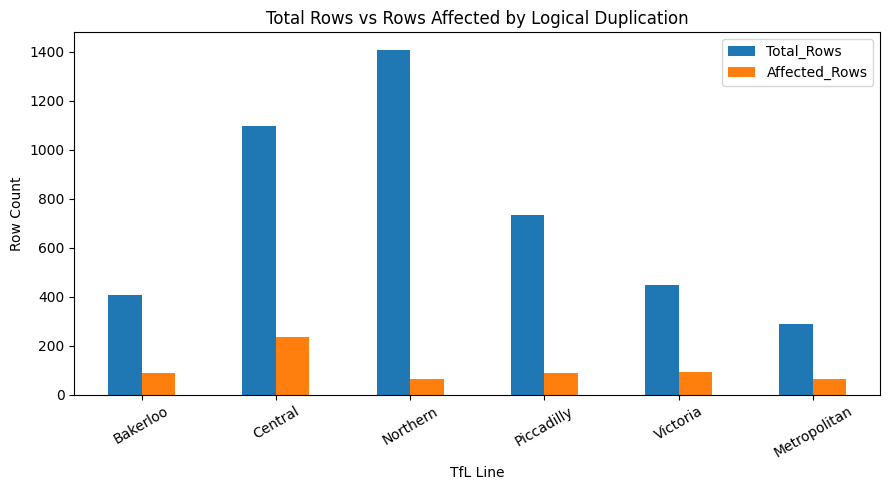

In [19]:
summary_df.set_index("Dataset").plot(
    kind="bar",
    figsize=(9, 5)
)

plt.title("Total Rows vs Rows Affected by Logical Duplication")
plt.ylabel("Row Count")
plt.xlabel("TfL Line")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Summary

- No exact duplicate rows found across datasets
- Logical duplicates detected due to frequent TfL Estimated Time of Arrival(ETA) Same train,Same station,Same arrival event, Different update timestampsrefresh cycles
- Null values observed in optional columns such as bearing, direction, and currentLocation
- Critical columns (vehicleId, stationName, expectedArrival) show good completeness
- Dataset is suitable for further Bronze–Silver processing
